# Part 4

#  

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import json
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

In [2]:
bd = pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')

In [3]:
bd.shape

(180, 7)

In [4]:
bd.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
bd.isnull().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

In [6]:
bd1=bd.copy()
bd1=bd1.dropna()

In [7]:
bd1.dtypes

Name      object
Runs     float64
Ave      float64
SR       float64
Fours    float64
Sixes    float64
HF       float64
dtype: object

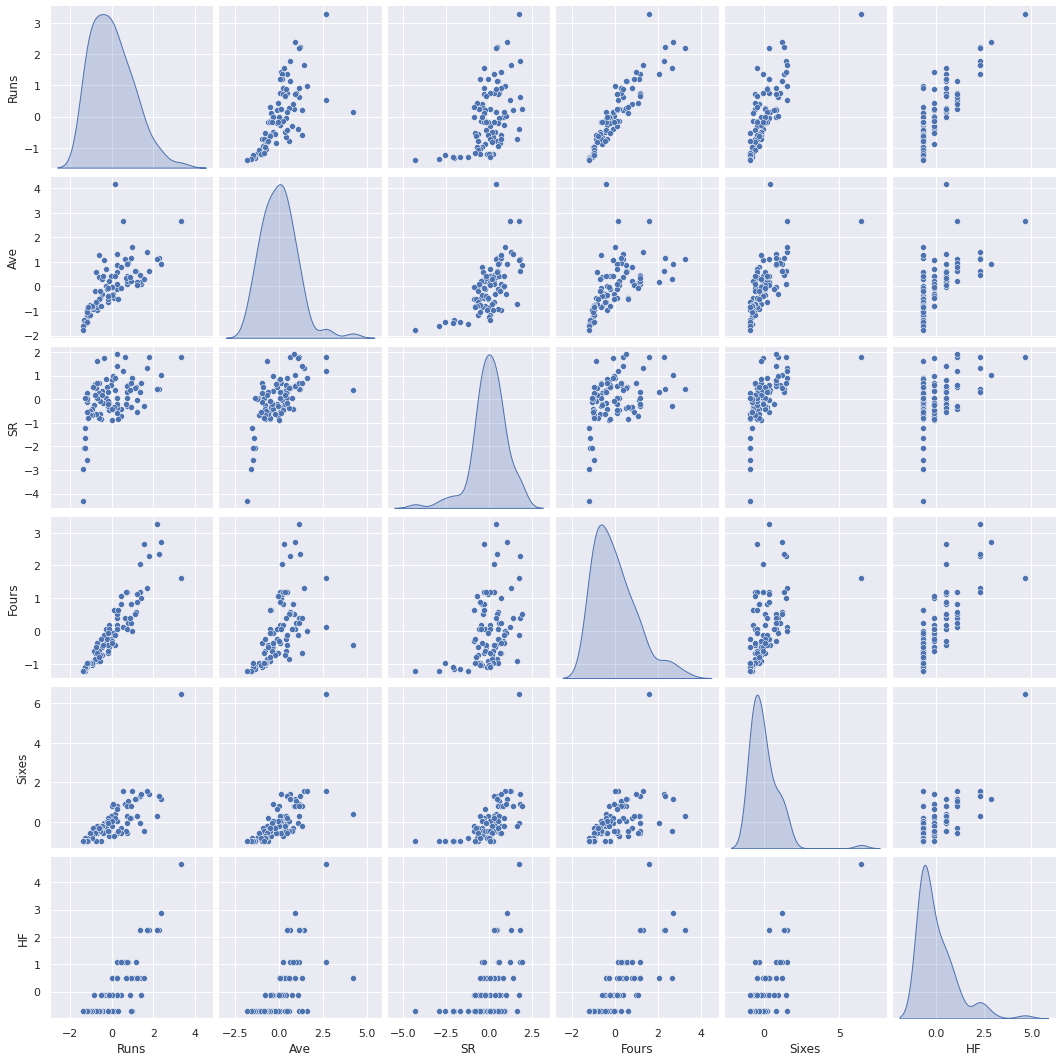

In [8]:
from scipy.stats import zscore
cricAttr=bd1.iloc[:,1:]
cricScaled=cricAttr.apply(zscore)
sns.pairplot(cricScaled,diag_kind='kde')

In [9]:
cricAttr.describe()

,Runs,Ave,SR,Fours,Sixes,HF
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,219.933333,24.729889,119.164111,19.788889,7.577778,1.188889
std,156.253669,13.619215,23.656547,16.399845,8.001373,1.688656
min,2.000000,0.500000,18.180000,0.000000,0.000000,0.000000
25%,98.000000,14.665000,108.745000,6.250000,3.000000,0.000000
50%,196.500000,24.440000,120.135000,16.000000,6.000000,0.500000
75%,330.750000,32.195000,131.997500,28.000000,10.000000,2.000000
max,733.000000,81.330000,164.100000,73.000000,59.000000,9.000000


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

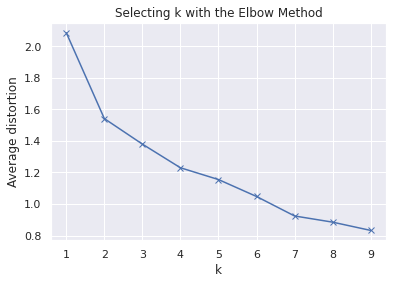

In [10]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cricScaled)
    prediction=model.predict(cricScaled)
    meanDistortions.append(sum(np.min(cdist(cricScaled, model.cluster_centers_, 'euclidean'), axis=1)) / cricScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


In [11]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(cricScaled)
prediction=final_model.predict(cricScaled)

#Append the prediction 
bd1["GROUP"] = prediction
cricScaled["GROUP"] = prediction
print("Groups Assigned : \n")
bd1.head()

Groups Assigned : 



,Name,Runs,Ave,SR,Fours,Sixes,HF,GROUP
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,1
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,1
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,1
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,1
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,1


In [12]:
from sklearn import svm

In [13]:
X = bd1.drop(['Name','GROUP'], axis=1)
# the dependent variable
y = bd1[['GROUP']]

In [14]:
bd1['GROUP'].value_counts()

3    44
0    32
1     7
2     7
Name: GROUP, dtype: int64

In [15]:
XScaled=X.apply(zscore)
XScaled.head()

,Runs,Ave,SR,Fours,Sixes,HF
1,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
3,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
5,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
7,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
9,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [18]:
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3)
clf.fit(X_train , y_train)

/home/mumbaikar/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=3, gamma=0.025)

In [19]:
y_pred = clf.predict(X_test)

In [20]:
clf.score(X_test,y_test)

0.9629629629629629

The model appears to be overfit

In [21]:
XScaled.shape

(90, 6)

In [22]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[1.01123596 0.70077082 0.49903347 0.9291323  0.77842677 0.84453142]
 [0.70077082 1.01123596 0.63061271 0.55234856 0.69008186 0.62772842]
 [0.49903347 0.63061271 1.01123596 0.38913406 0.59050396 0.43238784]
 [0.9291323  0.55234856 0.38913406 1.01123596 0.52844526 0.79249429]
 [0.77842677 0.69008186 0.59050396 0.52844526 1.01123596 0.77632221]
 [0.84453142 0.62772842 0.43238784 0.79249429 0.77632221 1.01123596]]


In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(XScaled)

PCA(n_components=6)

In [24]:
print(pca.explained_variance_)

[4.30252561 0.83636692 0.41665751 0.32912443 0.16567829 0.01706297]


In [25]:
print(pca.explained_variance_ratio_)

[0.70911996 0.13784566 0.06867133 0.05424458 0.02730624 0.00281223]


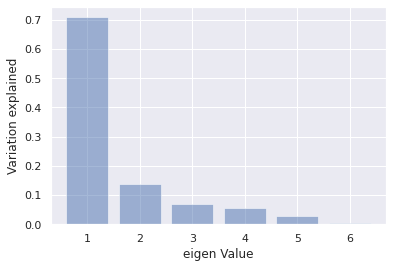

In [26]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

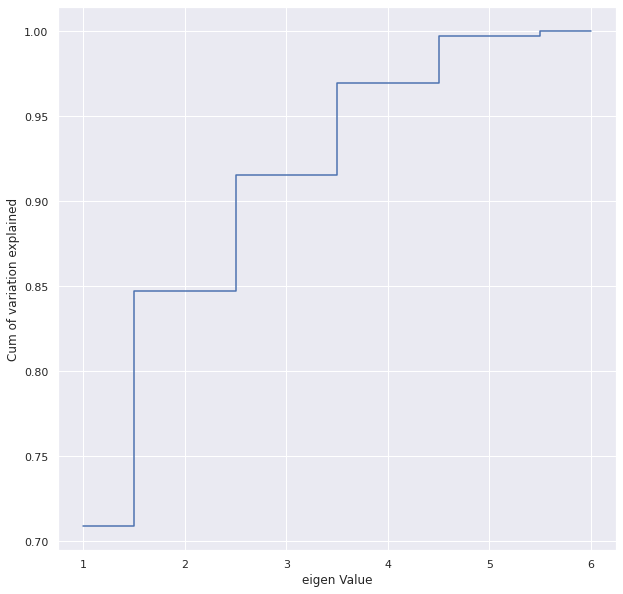

In [27]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [28]:
pca4 = PCA(n_components=4)
pca4.fit(XScaled)
print(pca4.components_)
print(pca4.explained_variance_ratio_)
Xpca4 = pca4.transform(XScaled)

[[ 0.4582608   0.39797313  0.3253838   0.40574167  0.41733459  0.43237178]
 [ 0.26643209 -0.33111756 -0.69780334  0.47355804 -0.17902455  0.27593225]
 [-0.10977942  0.00550486 -0.45013448 -0.50823538  0.66942589  0.28082541]
 [-0.00520142  0.84736307 -0.43275029 -0.03252305 -0.24878157 -0.17811777]]
[0.70911996 0.13784566 0.06867133 0.05424458]


In [29]:
Xpca4.shape

(90, 4)

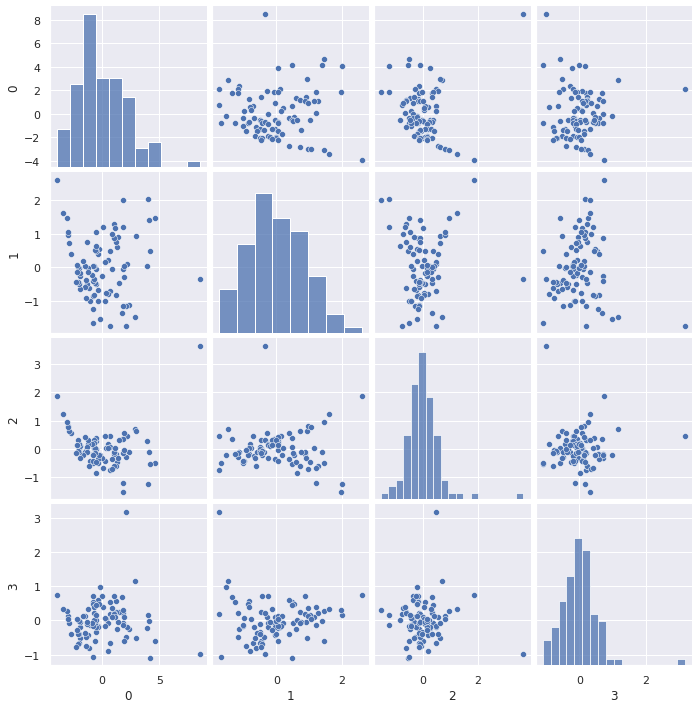

In [30]:
sns.pairplot(pd.DataFrame(Xpca4))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(Xpca4, y, test_size=0.30, random_state=1)

In [32]:
clf1 = svm.SVC(gamma=0.025, C=3)
clf1.fit(X_train , y_train)

/home/mumbaikar/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=3, gamma=0.025)

In [33]:
y_pred = clf1.predict(X_test)

In [34]:
clf1.score(X_test,y_test)

0.9629629629629629

It can be seen that by even after reducing dimentionality by 2, R^2 remained same!

With only 4 independent columns, model clf1 is likely to be less overfit.



# Part 5

Various ways of reducing dimentionality using Python include


1) Principal Comoponent Analysis : It performs eigen decomposition of data to compute eigen vectors which are principal components. Magnitude of variance captured by the eigen vectors is determined for reducing dimentions.

2) Missing Value Ratio
Variables with large number of missing values can be dropped

3) High Correlation: Variables having high correlation are not completely independent hence one of the correlated variable can be dropped.

4) Low Variance : Variables with low variance do have large impact on target variable and hence can be dropped.



In [35]:
#importing the dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
 
digits = load_digits()
data = digits.data
data.shape

(1797, 64)

In [36]:
data[0,0]

0.0

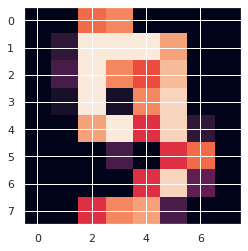

In [37]:

image = data[9,:].reshape(8,8)
plt.imshow(image)